Dataset loaded successfully. First 5 rows:
   ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1      20000    2          2         1   24      2      2     -1     -1   
1   2     120000    2          2         2   26     -1      2      0      0   
2   3      90000    2          2         2   34      0      0      0      0   
3   4      50000    2          2         1   37      0      0      0      0   
4   5      50000    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...          0          0          0         0       689         0   
1  ...       3272       3455       3261         0      1000      1000   
2  ...      14331      14948      15549      1518      1500      1000   
3  ...      28314      28959      29547      2000      2019      1200   
4  ...      20940      19146      19131      2000     36681     10000   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default pa

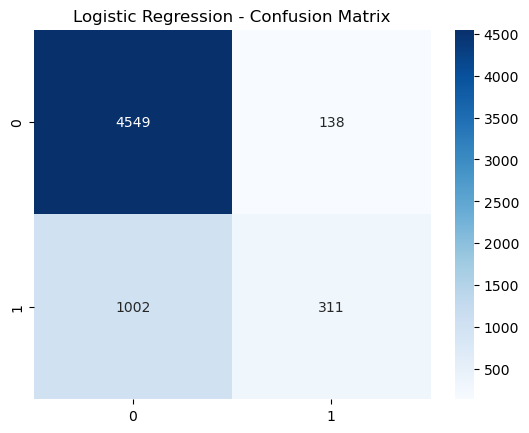

ROC-AUC Score: 0.7269867506354779


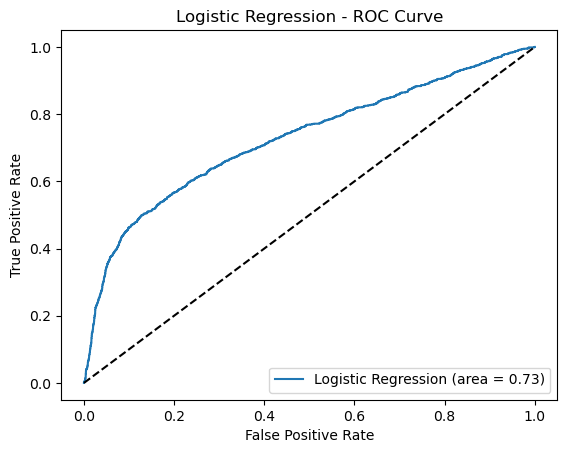


--- Decision Tree Evaluation ---
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.81      0.82      4687
           1       0.38      0.41      0.39      1313

    accuracy                           0.73      6000
   macro avg       0.61      0.61      0.61      6000
weighted avg       0.73      0.73      0.73      6000

Confusion Matrix:


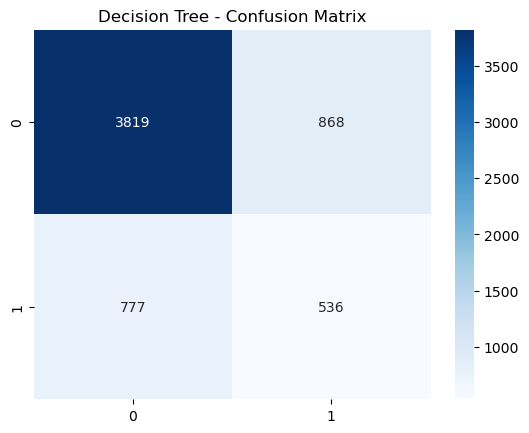

ROC-AUC Score: 0.6116371529490182


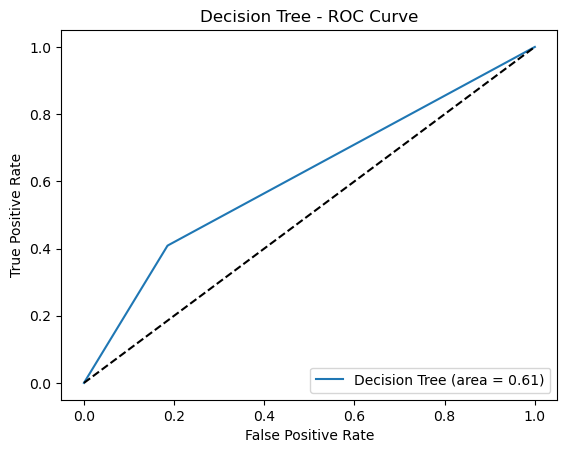


--- Random Forest Evaluation ---
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4687
           1       0.65      0.36      0.47      1313

    accuracy                           0.82      6000
   macro avg       0.75      0.65      0.68      6000
weighted avg       0.80      0.82      0.80      6000

Confusion Matrix:


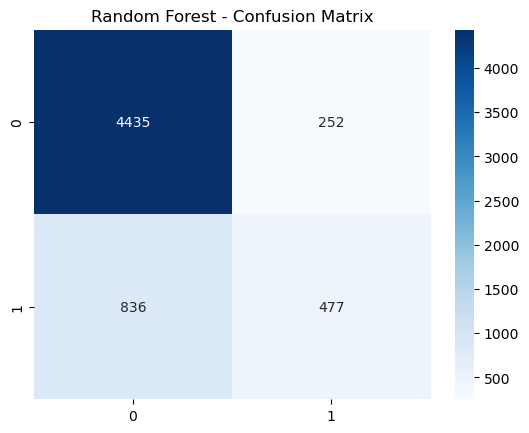

ROC-AUC Score: 0.7576304051767045


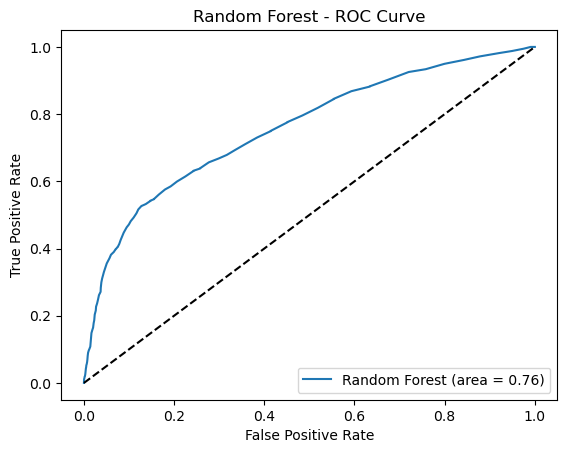


 All models trained and evaluated successfully.


In [1]:
# Credit Scoring Model - CodeAlpha Internship

# ------------------------------------
# 1. Importing libraries
# ------------------------------------
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# ------------------------------------
# 2. Load Dataset (Excel file)
# ------------------------------------
file_path = r"C:\Users\siddh\OneDrive\Desktop\default of credit card clients.xls"
df = pd.read_excel(file_path, header=1)  # header=1 skips the first row of description if present

# Verify successful loading
print("Dataset loaded successfully. First 5 rows:")
print(df.head())
print("\nColumns in dataset:")
print(df.columns)

# ------------------------------------
# 3. Data Cleaning / Preprocessing
# ------------------------------------
print("\nChecking for null values:")
print(df.isnull().sum())

# Drop ID column if present as it's not a feature
if 'ID' in df.columns:
    df = df.drop('ID', axis=1)

# Drop rows with missing values (if any)
df = df.dropna()

# ------------------------------------
# 4. Feature Selection
# ------------------------------------
# Target column is 'default payment next month' in this dataset
target_column = 'default payment next month'

X = df.drop(target_column, axis=1)
y = df[target_column]

# ------------------------------------
# 5. Train-Test Split
# ------------------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ------------------------------------
# 6. Scaling
# ------------------------------------
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ------------------------------------
# 7. Evaluation Function
# ------------------------------------
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    print(f"\n--- {model_name} Evaluation ---")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    
    print("Confusion Matrix:")
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f'{model_name} - Confusion Matrix')
    plt.show()
    
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
    print(f"ROC-AUC Score: {roc_auc}")
    
    # Plot ROC Curve
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
    plt.plot(fpr, tpr, label=f'{model_name} (area = {roc_auc:.2f})')
    plt.plot([0,1],[0,1],'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model_name} - ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

# ------------------------------------
# 8. Logistic Regression
# ------------------------------------
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
evaluate_model(log_reg, X_test, y_test, "Logistic Regression")

# ------------------------------------
# 9. Decision Tree
# ------------------------------------
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
evaluate_model(dtree, X_test, y_test, "Decision Tree")

# ------------------------------------
# 10. Random Forest
# ------------------------------------
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
evaluate_model(rf, X_test, y_test, "Random Forest")

# ------------------------------------
# 11. Completion Message
# ------------------------------------
print("\n All models trained and evaluated successfully.")

